## Proyek Analisis Data: E-Commerce 
- **Nama:** Usriyatul Khamimah
- **Email:** khamimahusriyatul@gmail.com
- **ID Dicoding:** Usriyatul Khamimah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penggunaan sepeda di musim panas?

- Pertanyaan 2 : Bagaimana tren penggunaan sepeda berdasarkan waktu (jam, hari, dan bulan)?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [5]:
hour_df = pd.read_csv('./data/hour.csv')
day_df = pd.read_csv('./data/day.csv')


### Assessing Data

In [6]:
# Inspect the datasets
print(hour_df.head())
print(day_df.head())

# Statistics and info
print(hour_df.describe())
print(day_df.describe())

print(hour_df.info())
print(day_df.info())

# Check for missing values
print(hour_df.isnull().sum())
print(day_df.isnull().sum())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

### Cleaning Data

In [7]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['hour'] = hour_df['hr']
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['month'] = hour_df['dteday'].dt.month_name()

## Exploratory Data Analysis (EDA)

### Explore ...

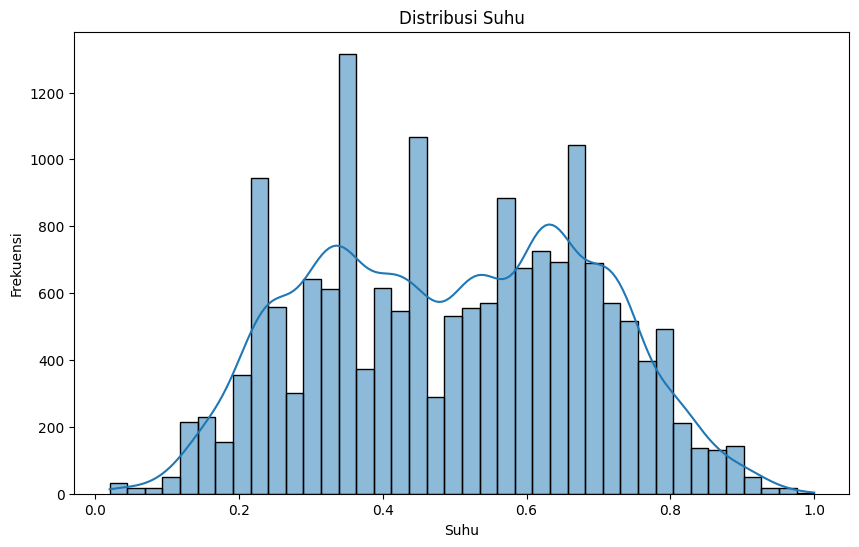

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh cuaca terhadap penggunaan sepeda

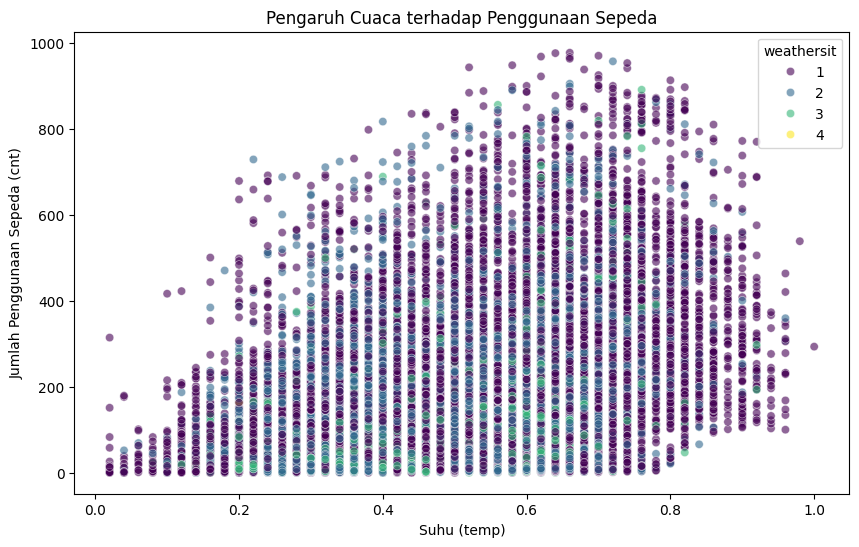

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='temp', y='cnt', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()


### Pertanyaan 2: Tren penggunaan sepeda berdasarkan waktu

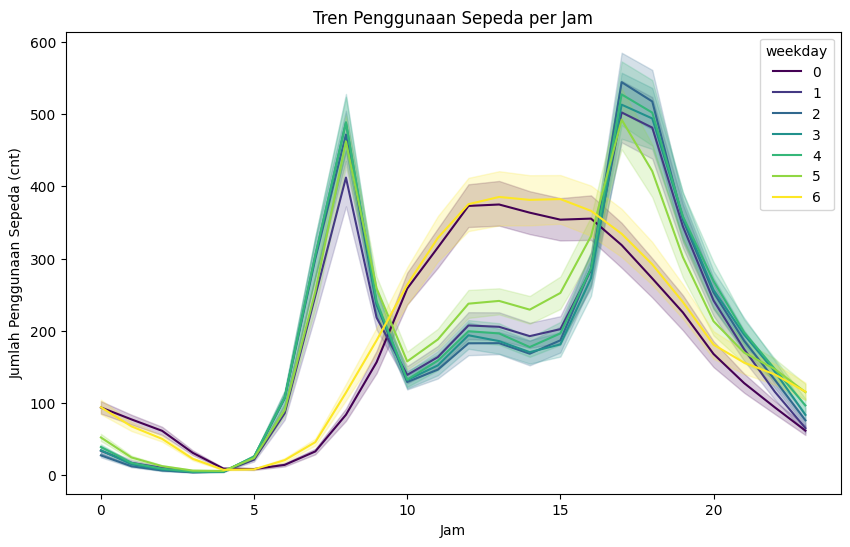

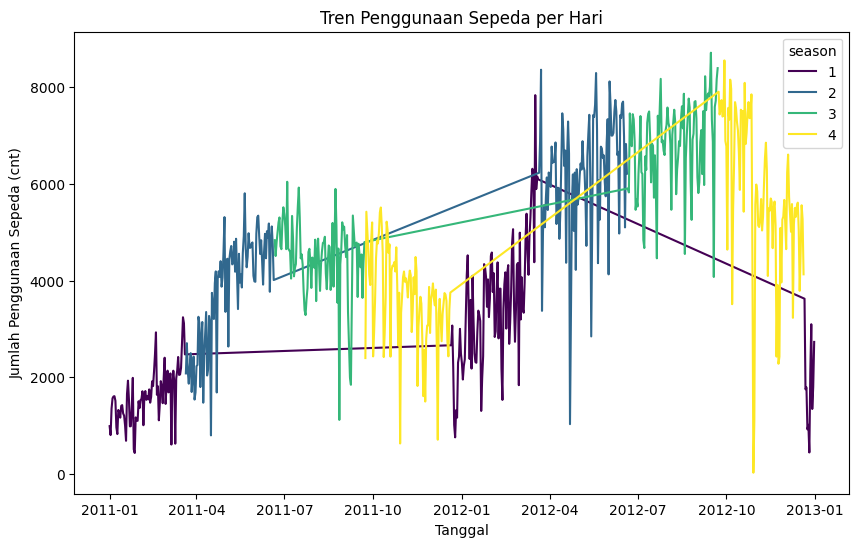

In [13]:
# Tren per jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weekday', palette='viridis')
plt.title('Tren Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

# Tren per hari
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season', palette='viridis')
plt.title('Tren Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()


## Conclusion

- Conclution pertanyaan 1
Cuaca cerah dan suhu yang nyaman cenderung meningkatkan penggunaan sepeda, sementara cuaca buruk dan suhu ekstrem dapat menurunkan penggunaan.
- Conclution pertanyaan 2
Penggunaan sepeda meningkat pada jam-jam sibuk harian, hari kerja, dan bulan-bulan dengan cuaca baik. Data ini dapat digunakan untuk merencanakan dan meningkatkan layanan berbagi sepeda berdasarkan pola penggunaan yang teridentifikasi.

## Analisis lanjutan

In [18]:
frequency_df = hour_df.groupby('casual').size().reset_index(name='frequency')

recency_df = hour_df.groupby('casual')['dteday'].max().reset_index(name='last_purchase')

rfm_df = pd.merge(frequency_df, recency_df, on='casual')

rfm_df.head()

,casual,frequency,last_purchase
0,0,1581,2012-12-31
1,1,1082,2012-12-30
2,2,798,2012-12-31
3,3,697,2012-12-31
4,4,561,2012-12-31
